In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
original_data_frame = pd.read_csv('grid_search_final_results.csv')
original_data_frame

,NAME,TRANSFER-FACTOR,N,T,STATUS,CONFIG,DISTRIBUTION
0,aggregation0,0.150242,0,0,SUCCESS,site_conf_2_site,0
1,aggregation0,0.150242,0,1,SUCCESS,site_conf_2_site,0
2,aggregation0,0.150242,0,10,SUCCESS,site_conf_2_site,0
3,aggregation0,0.150242,0,60,SUCCESS,site_conf_2_site,0
4,aggregation0,0.150242,1,0,SUCCESS,site_conf_2_site,0
...,...,...,...,...,...,...,...
11835,Sipht_30.xml,0.009004,10,60,SUCCESS,site_conf_4_site,4
11836,Sipht_30.xml,0.009004,100,0,SUCCESS,site_conf_4_site,4
11837,Sipht_30.xml,0.009004,100,1,SUCCESS,site_conf_4_site,4
11838,Sipht_30.xml,0.009004,100,10,SUCCESS,site_conf_4_site,4


In [8]:
original_data_frame.shape

(11840, 7)

In [10]:
original_data_frame['NAME'].unique()

array(['aggregation0', 'distribution0', 'groups0', 'longPipeline0',
       'multiPipeline0', 'redistribution0', 'aggregation1',
       'distribution1', 'groups1', 'longPipeline1', 'multiPipeline1',
       'redistribution1', 'aggregation2', 'distribution2', 'groups2',
       'longPipeline2', 'multiPipeline2', 'redistribution2',
       'aggregation3', 'distribution3', 'groups3', 'longPipeline3',
       'multiPipeline3', 'redistribution3', 'aggregation4',
       'distribution4', 'groups4', 'longPipeline4', 'multiPipeline4',
       'redistribution4', 'CyberShake_30', 'CyberShake_50',
       'CyberShake_100', 'CyberShake_1000', 'Epigenomics_24',
       'floodplain', 'Sipht_30.xml'], dtype=object)

In [13]:
realWfs = original_data_frame[original_data_frame['NAME'].isin(["CyberShake_30", "CyberShake_50", "CyberShake_100", "CyberShake_1000", "Epigenomics_24", "floodplain", "Sipht_30.xml" ])]
syntheticWfs = original_data_frame[~original_data_frame['NAME'].isin(["CyberShake_30", "CyberShake_50", "CyberShake_100", "CyberShake_1000", "Epigenomics_24", "floodplain", "Sipht_30.xml" ])]

In [23]:
aggregatedRealWfs = realWfs.groupby(['NAME','N','T'])['TRANSFER-FACTOR'].agg(['mean', 'std']).reset_index()
aggregatedRealWfs

,NAME,N,T,mean,std
0,CyberShake_100,0,0,0.399219,0.150077
1,CyberShake_100,0,1,0.399219,0.150077
2,CyberShake_100,0,10,0.399219,0.150077
3,CyberShake_100,0,60,0.399219,0.150077
4,CyberShake_100,1,0,0.399219,0.150077
...,...,...,...,...,...
107,floodplain,10,60,0.000000,0.000000
108,floodplain,100,0,0.000000,0.000000
109,floodplain,100,1,0.000000,0.000000
110,floodplain,100,10,0.000000,0.000000


In [20]:
syntheticWfs.groupby(['NAME','N','T'])['TRANSFER-FACTOR'].agg(['mean', 'std']).reset_index()
# std is basically derivation over distribution and sites

,NAME,N,T,mean,std
0,aggregation0,0,0,0.175175,0.026370
1,aggregation0,0,1,0.175175,0.026370
2,aggregation0,0,10,0.175175,0.026370
3,aggregation0,0,60,0.175175,0.026370
4,aggregation0,1,0,0.175175,0.026370
...,...,...,...,...,...
475,redistribution4,10,60,0.358094,0.213049
476,redistribution4,100,0,0.358094,0.213049
477,redistribution4,100,1,0.358094,0.213049
478,redistribution4,100,10,0.358094,0.213049


In [37]:
cybershake_100 = realWfs[realWfs['NAME'] == 'CyberShake_100']
with open("CyberShake_100.results" , "w") as f:
        f.write(aggregatedRealWfs[aggregatedRealWfs['NAME'] == 'CyberShake_100'].to_latex())


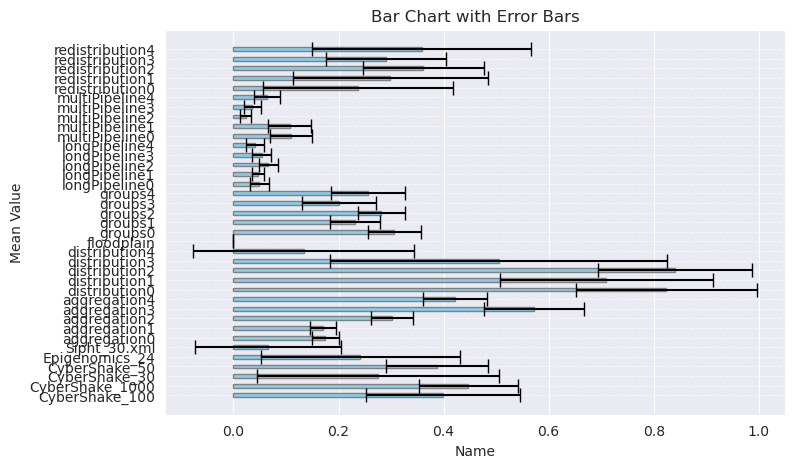

In [36]:
overall_aggregate = original_data_frame.groupby(['NAME'])['TRANSFER-FACTOR'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(8, 5))
plt.barh(overall_aggregate["NAME"], overall_aggregate["mean"], xerr=overall_aggregate["std"], capsize=5, color='skyblue', edgecolor='gray', height=0.4)
plt.title("Bar Chart with Error Bars")
plt.xlabel("Name")
plt.ylabel("Mean Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [51]:
with open('cybershake_100_distributions_configs', 'w') as file:
        result = cybershake_100.groupby(['CONFIG','DISTRIBUTION'])['TRANSFER-FACTOR'].agg(['mean', 'std']).reset_index()
        result_latx = result.to_latex(index=False)

        file.write(result_latx.replace('_','\_'))
